

<span style="font-size:30px">Tarea 4: Generar el modelo </span>

# Modelamiento

###MODELAMIENTO

### Importar datos


In [69]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

data = pd.read_csv('datos_procesados.csv', index_col=0)

### Explorar datos

In [70]:
data.head()

,caller_id,opened_by,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,u_priority_confirmation,duracion_horas
number,,,,,,,,,,,,,,
INC0000077,Caller 3304,Opened by 180,Phone,Location 108,Category 32,Subcategory 9,Symptom 470,2 - Medium,2 - Medium,3 - Moderate,Group 70,No asignado,False,0.616667
INC0000088,Caller 388,Opened by 180,Phone,Location 93,Category 42,Subcategory 224,Symptom 4,2 - Medium,2 - Medium,3 - Moderate,Group 70,No asignado,False,0.283333
INC0000101,Caller 1892,Opened by 180,Phone,Location 143,Category 55,Subcategory 170,Symptom 273,2 - Medium,3 - Low,4 - Low,Group 65,Resolver 180,False,1.916667
INC0000192,Caller 1590,Opened by 131,Phone,Location 143,Category 45,Subcategory 200,Symptom 4,2 - Medium,2 - Medium,3 - Moderate,Group 70,No asignado,False,0.066667
INC0000167,Caller 649,Opened by 24,Phone,Location 108,Category 20,Subcategory 125,No reportado,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 17,False,0.583333


In [71]:
#revisar que no hay nas
data.isna().sum()


caller_id                  0
opened_by                  0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
u_priority_confirmation    0
duracion_horas             0
dtype: int64

In [72]:
#revisar que tipo de datos hay en cada columna 
data.dtypes

caller_id                   object
opened_by                   object
contact_type                object
location                    object
category                    object
subcategory                 object
u_symptom                   object
impact                      object
urgency                     object
priority                    object
assignment_group            object
assigned_to                 object
u_priority_confirmation       bool
duracion_horas             float64
dtype: object


Tecnicamente solo me importa Priority porque segun el diccionario "priority: calculada por el sistema en base al 'impacto' y la 'urgencia'" 
Entonces la columna priority ya me tiene en cuenta el impacto y urgencia. Por eso borrare impacto y urgencia y me concentrare solo el prioridad


In [73]:
#sacar lsa columnas urgencia e impacto del data frame
data = data.drop('urgency', axis=1)
data = data.drop('impact', axis=1)
data.head()


,caller_id,opened_by,contact_type,location,category,subcategory,u_symptom,priority,assignment_group,assigned_to,u_priority_confirmation,duracion_horas
number,,,,,,,,,,,,
INC0000077,Caller 3304,Opened by 180,Phone,Location 108,Category 32,Subcategory 9,Symptom 470,3 - Moderate,Group 70,No asignado,False,0.616667
INC0000088,Caller 388,Opened by 180,Phone,Location 93,Category 42,Subcategory 224,Symptom 4,3 - Moderate,Group 70,No asignado,False,0.283333
INC0000101,Caller 1892,Opened by 180,Phone,Location 143,Category 55,Subcategory 170,Symptom 273,4 - Low,Group 65,Resolver 180,False,1.916667
INC0000192,Caller 1590,Opened by 131,Phone,Location 143,Category 45,Subcategory 200,Symptom 4,3 - Moderate,Group 70,No asignado,False,0.066667
INC0000167,Caller 649,Opened by 24,Phone,Location 108,Category 20,Subcategory 125,No reportado,3 - Moderate,Group 70,Resolver 17,False,0.583333


Ver cuantas categorias tiene cada variable

In [74]:
print("caller id:", len(data['caller_id'].unique()))
print("opened_by:", len(data['opened_by'].unique()))
print("contact_type:", len(data['contact_type'].unique()))
print("location:", len(data['location'].unique()))
print("category:", len(data['category'].unique()))
print("subcategory:", len(data['subcategory'].unique()))
print("u_symptom:", len(data['u_symptom'].unique()))
print("priority:", len(data['priority'].unique()))
print("assignment_group:", len(data['assignment_group'].unique()))
print("assigned_to:", len(data['assigned_to'].unique()))
print("u_priority_confirmation:", len(data['u_priority_confirmation'].unique()))

caller id: 5004
opened_by: 200
contact_type: 4
location: 213
category: 54
subcategory: 237
u_symptom: 420
priority: 4
assignment_group: 69
assigned_to: 211
u_priority_confirmation: 2


### Dividir datos entre train y test

In [75]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split( data, test_size=0.2, random_state=2)

In [76]:
#revisar dimensiones sean 80% train 20% test
print(train_data.shape)
print(test_data.shape)

(17197, 12)
(4300, 12)


usaremos train_data para crear el modelo y test_data para probarlo

<span style="font-size:22px">HACER CLUSTERING</span>

Como el modelo de regresion solo puede recibir datos numericos (ya sean variables dummies), hay que tratar los datos categoricos de alguna manera. Para esto se va a emplear el metodo de clustering para las variables (columnas) que tiene mas de 6 categorias. 

** Las variables con menos de 6 categorias se trataran mas adelante como variables dummies. 

El metodo de clustering que se usará es el de K-means

Solo se hara el clustering con el test data para evitar el leakage de info entre train y test data

In [77]:
#Crear funcion para determinar numero de clusters K

def k_adecuado( nombre_col:str, dataset:pd.DataFrame ):
    #features es solo un data set que en cada fila tiene las estadisticas de duracion horas
    features = (dataset.groupby(nombre_col)["duracion_horas"]
            .agg(mean="mean", median="median", std="std",
                 p25=lambda x: x.quantile(0.25),
                 p75=lambda x: x.quantile(0.75),
                 p90=lambda x: x.quantile(0.90))
            .fillna(0))

    print(features)


    # --- 2) Estandarizar rápido 
    X = (features - features.mean()) / features.std().replace(0, 1.0) #replace hace que si el std dev de alguna location es 0 porque solo hay una obs, no divida la normalizacion por 0
    X = X.values  # matriz para sklearn

    # --- 3) Barrido de k: inercia (codo) + silhouette
    Ks = range(2, 30)  # prueba k = 2..30
    inertias, sils = [], []

    for k in Ks:
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = km.fit_predict(X)
        inertias.append(km.inertia_)
        sils.append(silhouette_score(X, labels))  # ∈ [-1, 1]; mayor es mejor

    # --- 4) Graficar ambas curvas
    fig, ax = plt.subplots()
    ax.plot(Ks, inertias, marker="o")
    ax.set_xlabel("Número de clusters (k)")
    ax.set_ylabel("Inercia (codo)")
    ax.set_title("Método del codo")
    # Añadir etiquetas a cada punto
    ax.set_xticks(Ks)
    plt.show()


    #pedir input del star y end de la grafica 

    # --- Pedir input para el rango a graficar
    start = int(input("Ingrese el valor de k inicial para graficar: "))
    end = int(input("Ingrese el valor de k final para graficar: "))


    # Filtrar el rango
    Ks_range = [k for k in Ks if start <= k <= end]
    sils_range = [sils[i] for i, k in enumerate(Ks) if start <= k <= end]

    # --- Graficar Silhouette vs k en el rango seleccionado
    fig, ax = plt.subplots()
    ax.plot(Ks_range, sils_range, marker="o")
    ax.set_xlabel("Número de clusters (k)")
    ax.set_ylabel("Silhouette promedio")
    ax.set_title("Silhouette vs k")
    ax.set_xticks(Ks_range)
    plt.show()

    '''
    fig, ax = plt.subplots()
    ax.plot(Ks, sils, marker="o")
    ax.set_xlabel("Número de clusters (k)")
    ax.set_ylabel("Silhouette promedio")
    ax.set_title("Silhouette vs k")
    # Añadir etiquetas a cada punto
    ax.set_xticks(Ks)
    plt.show()
    '''
    # --- 5) k sugerido por silhouette
    best_k = Ks[int(np.argmax(sils))]
    print("Mejor k por silhouette:", best_k, " | silhouette:", max(sils))

    k_escogido= int(input("Ingrese el valor de k escogido: "))
    return (k_escogido, features)

#Crear funcion para asignar el cluster adecuado a cada categoria

def clusters(k, features: pd.DataFrame):
    # Estandarizar igual que en k_adecuado
    features_scaled = (features - features.mean()) / features.std().replace(0, 1.0)

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(features_scaled.values)

    df_clusters = features.copy()
    df_clusters["cluster"] = labels

    return df_clusters, kmeans


Invocar el número de clusters por variable y guardar el df que devuelve en respectiva variable

                   mean      median         std        p25         p75  \
caller_id                                                                
Caller 10    108.700000  108.700000   50.958829  90.683333  126.716667   
Caller 1000    0.066667    0.066667    0.000000   0.066667    0.066667   
Caller 1001  168.740000   29.533333  221.406288   8.433333  321.450000   
Caller 1002    1.158333    1.158333    1.567420   0.604167    1.712500   
Caller 1004    0.150000    0.150000    0.000000   0.150000    0.150000   
...                 ...         ...         ...        ...         ...   
Caller 995    66.311111   18.025000  123.160226  17.866667   18.870833   
Caller 996    38.711111   47.450000   35.051773  23.783333   58.008333   
Caller 997    71.691667   71.533333   71.240886  15.854167  127.370833   
Caller 998    57.920000    1.066667  104.396780   0.533333   46.533333   
Caller 999    77.670833    0.600000  154.486567   0.208333   78.062500   

                    p90  
caller_id  

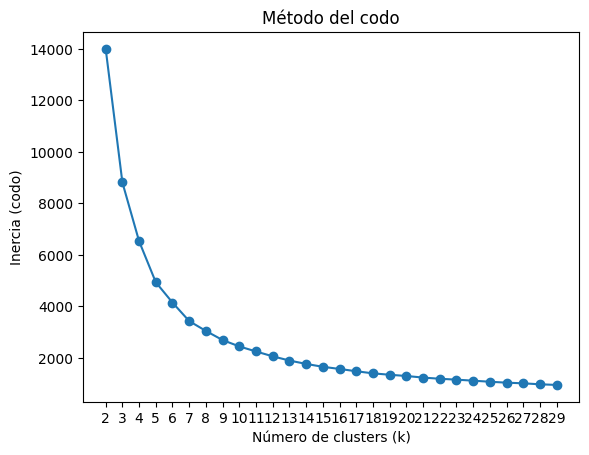

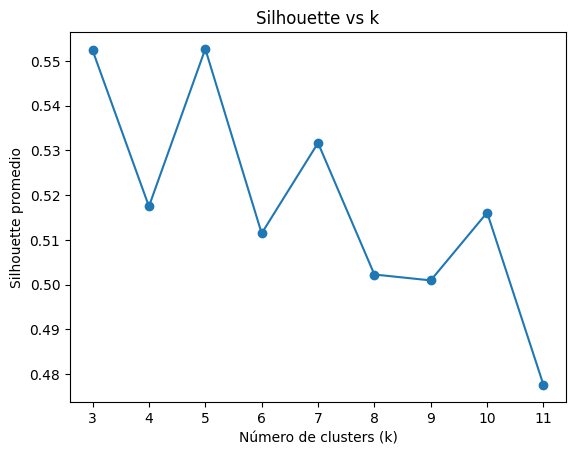

Mejor k por silhouette: 2  | silhouette: 0.5826709730973714
                      mean      median         std        p25         p75  \
opened_by                                                                   
Opened by  10   155.905556   55.783333  210.227571   4.808333  272.475000   
Opened by  101   64.475000   64.475000   51.559869  46.245833   82.704167   
Opened by  104  193.383333  193.383333  271.364012  97.441667  289.325000   
Opened by  108   93.737570   24.283333  136.654719   0.783333  141.566667   
Opened by  109   76.758696    2.050000  146.264291   0.516667   82.225000   
...                    ...         ...         ...        ...         ...   
Opened by  88    41.916667   41.916667    0.000000  41.916667   41.916667   
Opened by  9    218.184409  191.933333  171.454476  60.808333  324.516667   
Opened by  90    28.333333   28.333333    0.000000  28.333333   28.333333   
Opened by  91    21.705556    3.333333   34.600282   1.750000   32.475000   
Opened by  94   

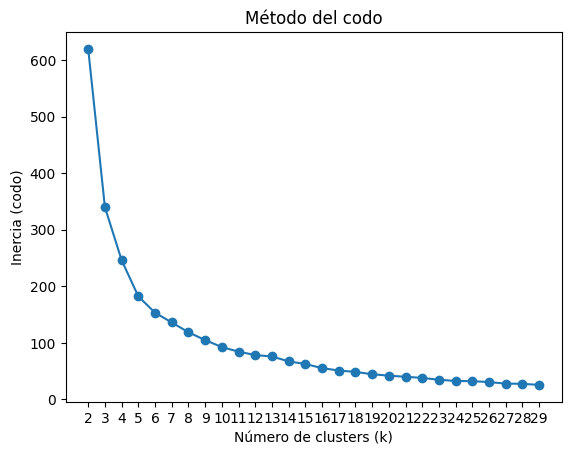

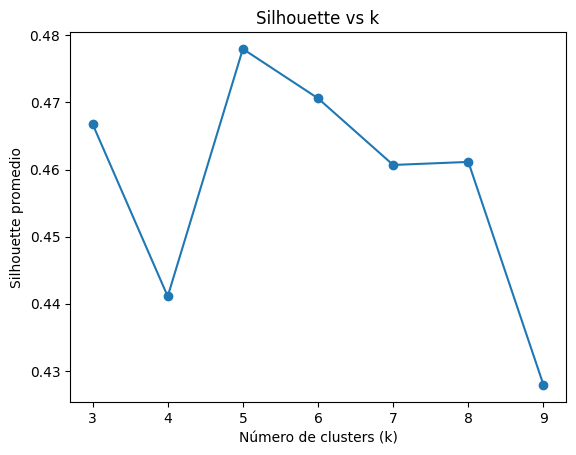

Mejor k por silhouette: 5  | silhouette: 0.4779672320750413
                    mean     median         std        p25         p75  \
location                                                                 
Location 10    35.683333  35.683333   48.201112  18.641667   52.725000   
Location 100   18.683333  18.683333    0.000000  18.683333   18.683333   
Location 101    8.550000   8.550000    0.000000   8.550000    8.550000   
Location 102    1.000000   1.000000    0.000000   1.000000    1.000000   
Location 106    0.283333   0.283333    0.000000   0.283333    0.283333   
...                  ...        ...         ...        ...         ...   
Location 95     0.066667   0.066667    0.000000   0.066667    0.066667   
Location 96    92.734649  28.475000  134.607952   0.904167  142.308333   
Location 97    74.879279   1.341667  143.644744   0.270833   92.541667   
Location 98    31.033333  31.033333    0.000000  31.033333   31.033333   
Location 99   151.538095  73.641667  202.354910   0.

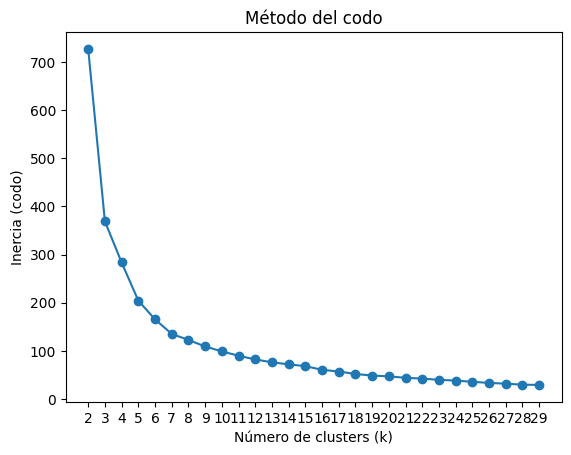

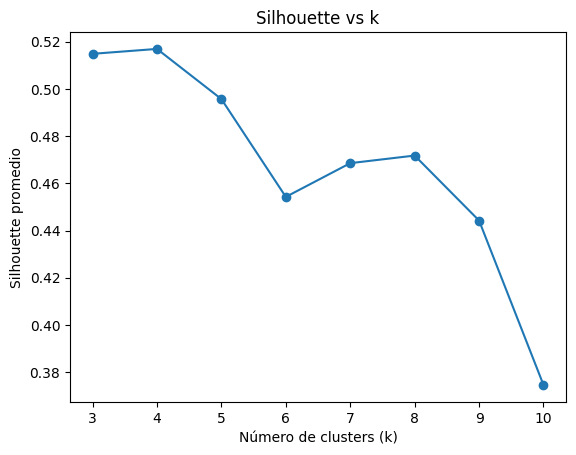

Mejor k por silhouette: 2  | silhouette: 0.5806194439295094
                   mean      median         std         p25         p75  \
category                                                                  
Category 10   93.433333  114.966667   41.493386   80.283333  117.350000   
Category 12   53.433333   53.433333    0.000000   53.433333   53.433333   
Category 13   99.702778   63.075000  117.342181    9.412500  143.358333   
Category 14   87.766667   87.766667    0.000000   87.766667   87.766667   
Category 15    0.366667    0.366667    0.000000    0.366667    0.366667   
Category 16    2.966667    2.966667    2.121320    2.216667    3.716667   
Category 17   65.871667   19.850000  110.025007    0.862500   72.658333   
Category 19  113.354192   32.083333  166.154502    4.166667  143.516667   
Category 2     0.700000    0.700000    0.377124    0.566667    0.833333   
Category 20   51.314444    1.525000   94.644466    0.216667   55.633333   
Category 21   62.079167   58.083333   48

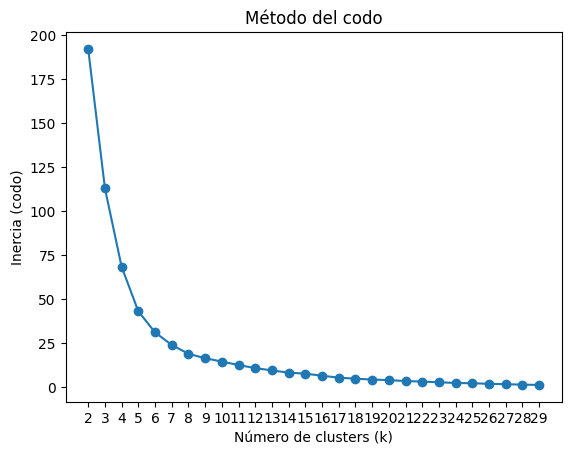

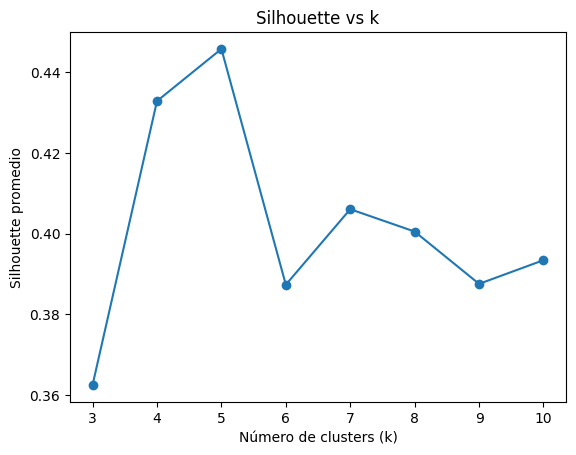

Mejor k por silhouette: 2  | silhouette: 0.7641252168368449
                       mean      median         std         p25         p75  \
subcategory                                                                   
Subcategory 10    13.690476    0.166667   27.524361    0.066667   11.000000   
Subcategory 100  124.200000  124.200000    0.000000  124.200000  124.200000   
Subcategory 101  110.377778   54.066667  125.977368    1.066667  146.983333   
Subcategory 102   97.633333   97.633333  137.909393   48.875000  146.391667   
Subcategory 103   48.438889    1.600000   92.974437    0.283333   50.250000   
...                     ...         ...         ...         ...         ...   
Subcategory 92    92.807407   45.250000  122.998627    0.483333  169.800000   
Subcategory 94   176.980952  116.500000  183.801602   27.466667  263.416667   
Subcategory 95     0.650000    0.650000    0.000000    0.650000    0.650000   
Subcategory 96   678.950000  678.950000    1.484924  678.425000  679.47

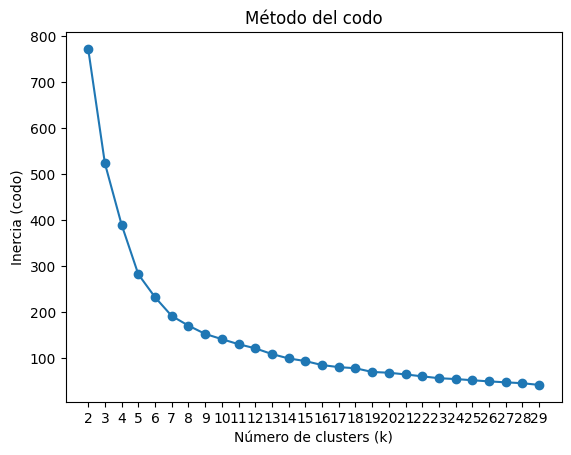

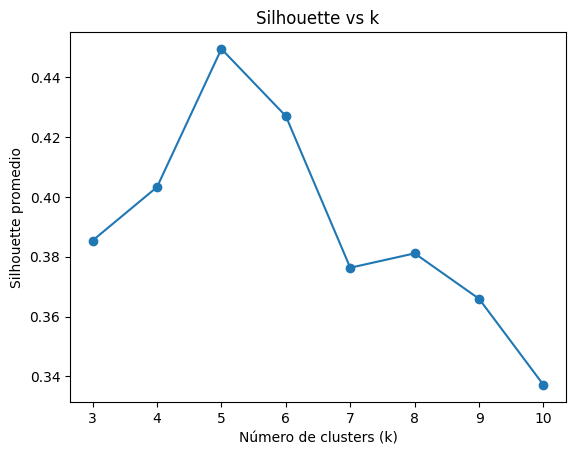

Mejor k por silhouette: 2  | silhouette: 0.5038999538325145
                    mean     median         std        p25         p75  \
u_symptom                                                                
No reportado   95.326568  22.000000  146.569403   0.516667  142.891667   
Symptom 10    100.541896  63.333333  116.266677  15.633333  138.133333   
Symptom 101   120.153333  89.950000   93.576098  48.766667  192.116667   
Symptom 102   121.552891  49.550000  143.617017   7.591667  185.808333   
Symptom 105    19.793124   0.133333   66.924207   0.066667    0.375000   
...                  ...        ...         ...        ...         ...   
Symptom 92      2.233333   2.233333    1.249222   1.791667    2.675000   
Symptom 93     56.469444  31.058333   71.865976   9.250000   69.429167   
Symptom 94     17.500000   3.166667   22.450677   3.016667   24.116667   
Symptom 97    153.766667  21.733333  245.179488  12.316667  229.200000   
Symptom 99     41.233333   5.916667   65.444915   3.

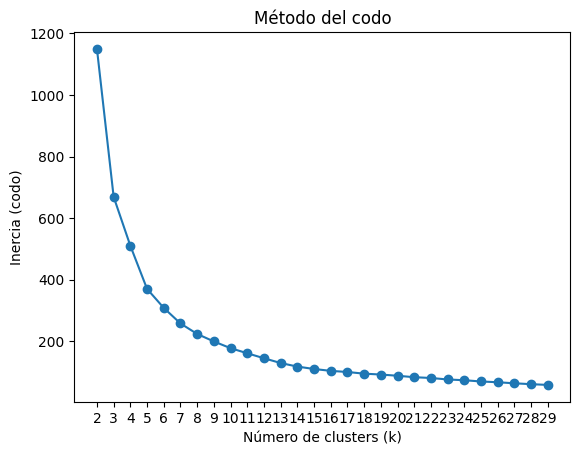

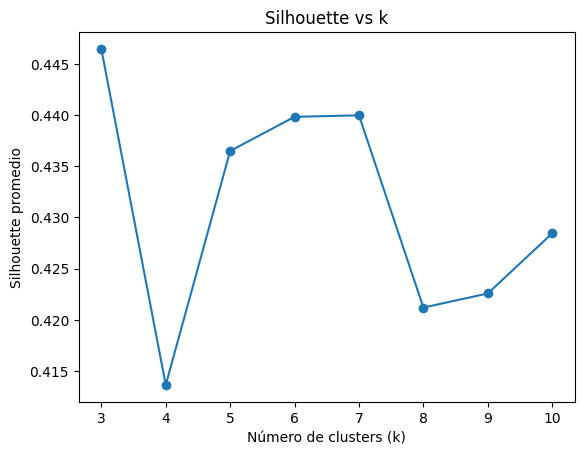

Mejor k por silhouette: 2  | silhouette: 0.5755051203258427
                        mean      median         std         p25         p75  \
assignment_group                                                               
Group 10          224.005469  171.350000  214.223908   23.325000  380.229167   
Group 12          251.326587  286.450000  184.975116   86.341667  359.295833   
Group 13          172.914912   99.916667  196.306470   25.833333  304.458333   
Group 14           99.295833   97.750000   83.552954   53.966667  143.079167   
Group 15          205.991667  119.941667  215.125000   19.895833  358.683333   
...                      ...         ...         ...         ...         ...   
Group 80          202.016667  196.616667  202.270735   99.558333  301.775000   
Group 81          140.902381  145.533333  120.079979   58.341667  182.075000   
Group 82           38.419444   18.266667   48.521815    4.641667   58.866667   
Group 9           344.895614  361.433333  229.806955  169.34

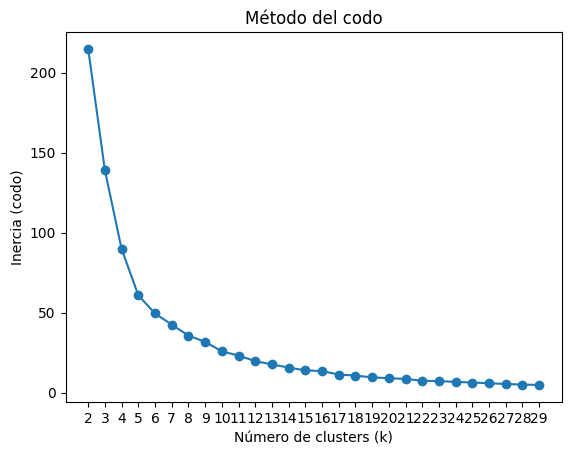

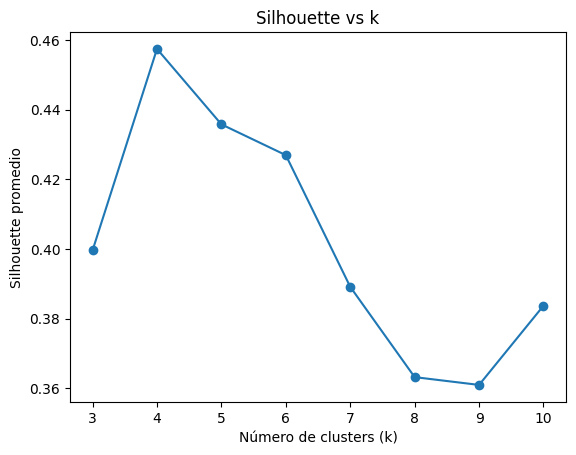

Mejor k por silhouette: 2  | silhouette: 0.47413536604526924
                    mean      median         std         p25         p75  \
assigned_to                                                                
No asignado    95.850144   21.333333  146.836279    0.400000  145.879167   
Resolver 10    69.312879   17.508333  109.250333    2.579167  111.595833   
Resolver 100  185.156173  119.683333  178.317836   71.325000  228.791667   
Resolver 101  210.617376  138.133333  211.132354   19.350000  360.625000   
Resolver 103  304.796667  263.416667  142.957701  247.350000  414.383333   
...                  ...         ...         ...         ...         ...   
Resolver 93   224.697917  172.983333  207.710915   46.770833  363.558333   
Resolver 94     7.031481    0.100000   27.442406    0.033333    0.645833   
Resolver 96   125.637500   72.375000  140.071538   40.437500  157.575000   
Resolver 97    99.821429   72.300000  107.228441   10.112500  141.383333   
Resolver 99    32.500000   

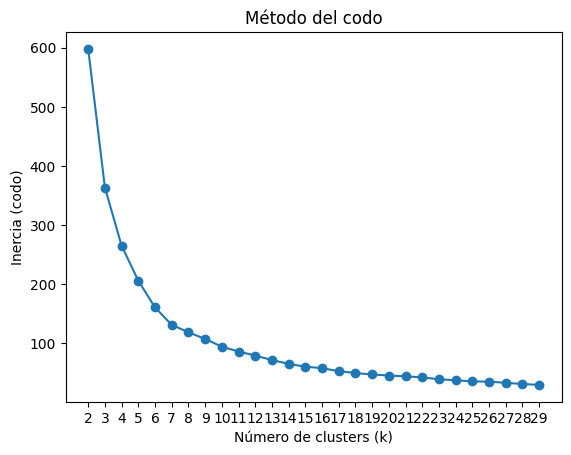

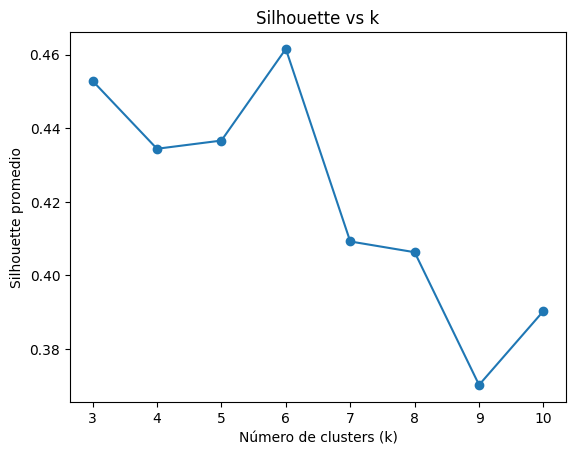

Mejor k por silhouette: 2  | silhouette: 0.5254492939493673


In [79]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#lista de columnas que tienen muchas categorias
cols=['caller_id', 'opened_by', 'location', 'category', 'subcategory', 'u_symptom', 'assignment_group', 'assigned_to']

features_dict={}
for col in cols:
    features_dict[f"features_{col}"] = k_adecuado(col, train_data)

In [ ]:
#Ver lo que retorna K_adecuado
#un diccionario con con llave llamada features_COLUMNA 
# valores es una tupla de (K, features)
features_dict

{'features_caller_id': (5,
                     mean      median         std        p25         p75  \
  caller_id                                                                
  Caller 10    108.700000  108.700000   50.958829  90.683333  126.716667   
  Caller 1000    0.066667    0.066667    0.000000   0.066667    0.066667   
  Caller 1001  168.740000   29.533333  221.406288   8.433333  321.450000   
  Caller 1002    1.158333    1.158333    1.567420   0.604167    1.712500   
  Caller 1004    0.150000    0.150000    0.000000   0.150000    0.150000   
  ...                 ...         ...         ...        ...         ...   
  Caller 995    66.311111   18.025000  123.160226  17.866667   18.870833   
  Caller 996    38.711111   47.450000   35.051773  23.783333   58.008333   
  Caller 997    71.691667   71.533333   71.240886  15.854167  127.370833   
  Caller 998    57.920000    1.066667  104.396780   0.533333   46.533333   
  Caller 999    77.670833    0.600000  154.486567   0.208333 

#### Con los K ya definidos, clusterizar los datos y guardar esos dataframes de respuestas en un diccionario 

In [80]:
cluster_dict={}
for col in cols:
    k, feature = features_dict[f"features_{col}"]
    cluster_dict[col]= clusters(k,feature)

In [ ]:
cluster_dict


{'caller_id': (                   mean      median         std        p25         p75  \
  caller_id                                                                
  Caller 10    108.700000  108.700000   50.958829  90.683333  126.716667   
  Caller 1000    0.066667    0.066667    0.000000   0.066667    0.066667   
  Caller 1001  168.740000   29.533333  221.406288   8.433333  321.450000   
  Caller 1002    1.158333    1.158333    1.567420   0.604167    1.712500   
  Caller 1004    0.150000    0.150000    0.000000   0.150000    0.150000   
  ...                 ...         ...         ...        ...         ...   
  Caller 995    66.311111   18.025000  123.160226  17.866667   18.870833   
  Caller 996    38.711111   47.450000   35.051773  23.783333   58.008333   
  Caller 997    71.691667   71.533333   71.240886  15.854167  127.370833   
  Caller 998    57.920000    1.066667  104.396780   0.533333   46.533333   
  Caller 999    77.670833    0.600000  154.486567   0.208333   78.062500   

### Consolidar info de clusters y denifir a que cluster pertenece cada etiqueta 

In [81]:
# cluster_dict[col] = (df_clusters, kmeans)  

cluster_maps = {}  # {col: {categoria: id_cluster}}
for col in cols:
    df_clusters, _ = cluster_dict[col]
    # df_clusters tiene las estadísticas + columna 'cluster'; su índice son las categorías
    cluster_maps[col] = df_clusters['cluster'].to_dict()
cluster_maps

{'caller_id': {'Caller 10': 1,
  'Caller 1000': 2,
  'Caller 1001': 4,
  'Caller 1002': 2,
  'Caller 1004': 2,
  'Caller 1005': 2,
  'Caller 1006': 4,
  'Caller 1007': 4,
  'Caller 1009': 4,
  'Caller 101': 2,
  'Caller 1010': 2,
  'Caller 1011': 2,
  'Caller 1012': 2,
  'Caller 1013': 2,
  'Caller 1016': 2,
  'Caller 1017': 1,
  'Caller 1018': 2,
  'Caller 1019': 2,
  'Caller 102': 2,
  'Caller 1020': 0,
  'Caller 1021': 1,
  'Caller 1022': 2,
  'Caller 1024': 2,
  'Caller 1025': 0,
  'Caller 1026': 3,
  'Caller 1028': 3,
  'Caller 1029': 1,
  'Caller 103': 4,
  'Caller 1034': 2,
  'Caller 1035': 2,
  'Caller 1036': 2,
  'Caller 1037': 2,
  'Caller 1038': 2,
  'Caller 1039': 2,
  'Caller 104': 4,
  'Caller 1040': 2,
  'Caller 1041': 2,
  'Caller 1043': 3,
  'Caller 1044': 3,
  'Caller 1045': 0,
  'Caller 1049': 0,
  'Caller 1050': 2,
  'Caller 1054': 0,
  'Caller 1055': 2,
  'Caller 1056': 2,
  'Caller 1057': 0,
  'Caller 1058': 2,
  'Caller 1059': 2,
  'Caller 106': 2,
  'Caller 1060

### Crear columnas  por cluster en train y test + manejar “desconocidos”

In [82]:
# Crear copias para mejor organizacion
train_enc = train_data.copy()
test_enc  = test_data.copy()

high_card_cols = cols[:]  # las que clusterizaste
cluster_cols = []

for col in high_card_cols:
    newc = f"{col}_cluster"
    cluster_cols.append(newc)

    # Train: mapeo directo
    train_enc[newc] = train_enc[col].map(cluster_maps[col]).astype('Int64')

    # Test: mapeo; lo no visto en train queda como -1
    test_enc[newc]  = test_enc[col].map(cluster_maps[col])
    test_enc[newc]  = test_enc[newc].fillna(-1).astype(int)

# (Opcional pero recomendado) pasar estos *_cluster a string para tratarlos como categóricos en dummies
for c in cluster_cols:
    train_enc[c] = train_enc[c].astype(str)
    test_enc[c]  = test_enc[c].astype(str)

train_enc.head()

,caller_id,opened_by,contact_type,location,category,subcategory,u_symptom,priority,assignment_group,assigned_to,u_priority_confirmation,duracion_horas,caller_id_cluster,opened_by_cluster,location_cluster,category_cluster,subcategory_cluster,u_symptom_cluster,assignment_group_cluster,assigned_to_cluster
number,,,,,,,,,,,,,,,,,,,,
INC0024696,Caller 3492,Opened by 501,Phone,Location 93,Category 46,Subcategory 223,No reportado,3 - Moderate,Group 39,Resolver 183,True,7.233333,4,4,1,4,0,5,1,0
INC0012272,Caller 1904,Opened by 180,Phone,Location 188,Category 51,Subcategory 174,Symptom 491,3 - Moderate,Group 64,Resolver 94,False,0.533333,2,0,0,1,1,5,1,0
INC0032093,Caller 583,Opened by 17,Phone,Location 45,Category 46,Subcategory 251,Symptom 217,3 - Moderate,Group 22,Resolver 52,False,3.000000,2,4,1,4,1,5,2,2
INC0024729,Caller 3233,Opened by 385,Phone,Location 51,Category 26,Subcategory 275,Symptom 474,3 - Moderate,Group 70,No asignado,False,54.416667,0,0,1,4,1,5,1,2
INC0024097,Caller 116,Opened by 12,Phone,Location 204,Category 19,Subcategory 174,Symptom 491,3 - Moderate,Group 56,Resolver 167,True,4.200000,0,4,1,4,1,5,1,2


### Volver todo variables dummies 

In [101]:
# 3.1 Identificar categóricas “baja cardinalidad” (excluyendo las de high_card_cols ya tratadas)
cat_cols_all = train_enc.select_dtypes(include='object').columns.tolist()
low_card_cols = ["contact_type","priority", "u_priority_confirmation"]

# 3.2 Columnas que vamos a transformar con dummies:
dummies_cols = low_card_cols + cluster_cols

# Matrices categóricas -> dummies en train y test data 
Xtr_cat = pd.get_dummies(train_enc[low_card_cols + cluster_cols], drop_first=True, dtype=int)
Xte_cat = pd.get_dummies(test_enc[low_card_cols + cluster_cols],  drop_first=True, dtype=int)

# Alinear columnas entre train/test. (esto hace que si hay una categoria en test que no aparecio en train, el modelo pueda lidear con ella)
    #union garantiza el mismo espacio de variables
    #cols_union = unión de todas las columnas dummies vistas en train y test.
    #reindex obliga a que ambos dataframes tengan esas columnas en el mismo orden.

cols_union = Xtr_cat.columns.union(Xte_cat.columns)
X_train = Xtr_cat.reindex(columns=cols_union, fill_value=0)
X_test  = Xte_cat.reindex(columns=cols_union, fill_value=0)

#convertir u_priority_confirmation tmb en int
X_train["u_priority_confirmation"] = X_train["u_priority_confirmation"].astype(int)
X_test["u_priority_confirmation"]  = X_test["u_priority_confirmation"].astype(int)

# Crear la variable Y que quiero predecir en train y test
y_train = train_enc['duracion_horas'].astype(float)
y_test  = test_enc['duracion_horas'].astype(float)
print("X_train:", X_train.shape, " X_test:", X_test.shape) #revisar que tenga el mismo numero de columnas



X_train: (17197, 47)  X_test: (4300, 47)


### Crear el modelo de regresion

In [84]:
from sklearn.linear_model import LinearRegression

#crear el modelod e regresion llamado linreg
linreg = LinearRegression()
linreg.fit(X_train, y_train) 
    #hace el cálculo para encontrar los coeficientes𝛽  que minimizan el error cuadrático medio (MSE) en los datos de entrenamiento
    #Guarda esos coeficientes en el objeto linreg → accesibles en linreg.coef_ y linreg.intercept_.


#ver el valor de los coeficientes 

# Series con índice = nombres de las variables
coefs = pd.Series(linreg.coef_, index=X_train.columns)

# Mostrar ordenado por magnitud absoluta
coefs_sorted = coefs.sort_values(key=np.abs, ascending=False)

print("Intercepto:", linreg.intercept_)
print("\nTop 20 coeficientes (por magnitud):")
print(coefs_sorted.head(20))



Intercepto: 55.28962942700544

Top 20 coeficientes (por magnitud):
u_symptom_cluster_2           280.544930
caller_id_cluster_3           262.135822
assigned_to_cluster_3         222.723671
assigned_to_cluster_5         175.336031
subcategory_cluster_4         140.716501
opened_by_cluster_3           117.517904
category_cluster_3            113.397039
u_symptom_cluster_3            98.328825
u_symptom_cluster_4            96.972104
assigned_to_cluster_4          91.074660
caller_id_cluster_4            76.875557
assigned_to_cluster_1          74.235863
location_cluster_2             71.382030
assignment_group_cluster_1    -65.406567
u_symptom_cluster_1           -65.025186
caller_id_cluster_1            63.507381
subcategory_cluster_2          57.940765
u_symptom_cluster_6           -57.485437
caller_id_cluster_2           -51.275038
contact_type_Self service      47.541660
dtype: float64


In [94]:
from sklearn import metrics
import numpy as np
#Predecir la duracion tanto con los datos de train como con los de test
y_pred = linreg.predict(X_test)

print(y_pred)

# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

# r2 
R2= r2_score(y_test, y_pred)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)
print("R2: ", R2)

[112.0526347   36.78437893  74.1990965  ...  34.24206838  47.66356772
  81.88633646]
MAE:  87.75606333564507
MSE:  16509.470638326056
RMSE:  128.48918490801495
R2:  0.07789292017771277


RMSE / MAE: error promedio de predicción en las mismas unidades que tu target (duracion_horas).
→ Tus predicciones se equivocan en promedio unas 70–90 horas.

R²: proporción de la variabilidad explicada.

0.39 en train significa que el modelo explica aprox. 39% de la variación.

0.039 en test significa que en datos nuevos casi no explica nada (muy bajo).

Existen predicciones negativas, otro modelo donde se transforme el valor de duracion el log-> obliga al modelo tener valores >0. 

### Modelo con OLS

In [103]:
import statsmodels.api as sm

# Agregar constante (intercepto)
X_train_const = sm.add_constant(X_train)

# Ajustar modelo OLS
modelo = sm.OLS(y_train, X_train_const).fit()

# Resumen con p-values, R², etc.
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:         duracion_horas   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     284.0
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:00:10   Log-Likelihood:            -1.0485e+05
No. Observations:               17197   AIC:                         2.098e+05
Df Residuals:                   17156   BIC:                         2.101e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [104]:
#calcular VIF 

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = sm.add_constant(X_train)  # igual que en OLS
vif = pd.DataFrame()
vif["variable"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) 
              for i in range(X_vif.shape[1])]
print(vif.sort_values("VIF", ascending=False))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                      variable          VIF
0                        const  4594.623431
21          contact_type_Phone    42.484376
22   contact_type_Self service    29.961746
7   assignment_group_cluster_1    27.744664
8   assignment_group_cluster_2    27.176412
20          contact_type_Email    14.206685
16          category_cluster_1    10.385338
19          category_cluster_4     9.836130
33       priority_3 - Moderate     4.703544
42         u_symptom_cluster_1     4.648525
46         u_symptom_cluster_5     4.447613
34            priority_4 - Low     3.389395
32           priority_2 - High     2.397546
31         opened_by_cluster_4     2.141275
29         opened_by_cluster_2     2.036460
36       subcategory_cluster_1     2.030973
38       subcategory_cluster_3     1.650479
2        assigned_to_cluster_1     1.546669
3        assigned_to_cluster_2     1.531774
5        assigned_to_cluster_4     1.476798
17          category_cluster_2     1.314594
24          location_cluster_1  

In [105]:
data['contact_type'].unique()

array(['Phone', 'Email', 'Self service', 'Direct opening'], dtype=object)

HAY MUCHA MULTICOLINEALIDAD, Despues de analizar los vif se quitan las variables quito categorias como contact type

### Segundo modelo reducido de acordo con los que tenian mucha multicolinealidad

quitar contact type y assignment group y las que tienen vif NaN, que problamente son la baase 

In [ ]:
import statsmodels.api as sm

#quitar contact type y assignment group 
columnas_quitar = ["contact_type_Email", "contact_type_Phone","contact_type_Self service" ,
                   "assignment_group_cluster_1" , "assignment_group_cluster_2"  , "assignment_group_cluster_3", 
                    "assigned_to_cluster_0","caller_id_cluster_0","category_cluster_0","location_cluster_0","opened_by_cluster_0","subcategory_cluster_0","u_symptom_cluster_0" ]


X_train_2 = X_train.drop(columns=columnas_quitar)
X_test_2  = X_test.drop(columns=columnas_quitar)

# Agregar constante (intercepto)
X_train_const_2 = sm.add_constant(X_train_2)

# Ajustar modelo OLS
modelo_2 = sm.OLS(y_train, X_train_const_2).fit()

# Resumen con p-values, R², etc.
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:         duracion_horas   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     323.6
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:23:11   Log-Likelihood:            -1.0496e+05
No. Observations:               17197   AIC:                         2.100e+05
Df Residuals:                   17162   BIC:                         2.103e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [110]:
#calcular VIF 

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = sm.add_constant(X_train_2)  # igual que en OLS
vif = pd.DataFrame()
vif["variable"] = X_vif.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i) 
              for i in range(X_vif.shape[1])]
print(vif.sort_values("VIF", ascending=False))

                   variable         VIF
0                     const  205.975173
10       category_cluster_1   10.260039
13       category_cluster_4    9.680655
22    priority_3 - Moderate    4.687478
29      u_symptom_cluster_1    4.627049
33      u_symptom_cluster_5    4.439632
23         priority_4 - Low    3.377624
21        priority_2 - High    2.393735
20      opened_by_cluster_4    2.132568
18      opened_by_cluster_2    2.032446
24    subcategory_cluster_1    2.013232
26    subcategory_cluster_3    1.625685
2     assigned_to_cluster_2    1.405770
1     assigned_to_cluster_1    1.354114
14       location_cluster_1    1.298046
7       caller_id_cluster_2    1.284019
11       category_cluster_2    1.247562
9       caller_id_cluster_4    1.211303
27    subcategory_cluster_4    1.189309
5     assigned_to_cluster_5    1.157218
31      u_symptom_cluster_3    1.155994
3     assigned_to_cluster_3    1.130701
17      opened_by_cluster_1    1.110933
34      u_symptom_cluster_6    1.105846


### Tercer modelo quitando variables no significativas

se quita la variable category porque sus coeficientes en significancia individual no resultan estadisticamente relevantes

In [114]:
#quitar contact type y assignment group 
columnas_quitar = ["category_cluster_1", "category_cluster_2","category_cluster_3", "category_cluster_4"]

X_train_3 = X_train_2.drop(columns=columnas_quitar)
X_test_3  = X_test_2.drop(columns=columnas_quitar)

# Agregar constante (intercepto)
X_train_const_3 = sm.add_constant(X_train_3)

# Ajustar modelo OLS
modelo_3 = sm.OLS(y_train, X_train_const_3).fit()

# Resumen con p-values, R², etc.
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:         duracion_horas   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     366.5
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:43:34   Log-Likelihood:            -1.0497e+05
No. Observations:               17197   AIC:                         2.100e+05
Df Residuals:                   17166   BIC:                         2.102e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Validacion cruzada de ambos modelos 

In [117]:
#Crear modelos en sklearn para hacer validacion cruzada 

from sklearn.linear_model import LinearRegression

#crear el modelod e regresion llamado linreg ES EL COMPLETO
linreg = LinearRegression()
linreg.fit(X_train, y_train) 

#crear el modelod e regresion llamado linreg_2 ES EL REDUCIDO
linreg_2 = LinearRegression()
linreg_2.fit(X_train_2, y_train) 

#crear el modelod e regresion llamado linreg_2 ES EL reducido reducido 
linreg_3 = LinearRegression()
linreg_3.fit(X_train_3, y_train) 

#VALIDACION CRUZSADA
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores_1 = cross_val_score(linreg, X_train, y_train , cv=5, scoring='neg_mean_squared_error')
mse_scores_1 = - scores_1
print("MODELO 1 MSE", mse_scores_1)
# calcular RMSE
rmse_scores_1 = np.sqrt(mse_scores_1)
print("MODELO 1 RMSE",rmse_scores_1)
# RMSE promedio a través de todos los grupos
print("MODELO 1 RMSE promedio" , rmse_scores_1.mean())

# usar MSE - error cuadrático medio
scores_2 = cross_val_score(linreg_2, X_train_2, y_train , cv=5, scoring='neg_mean_squared_error')
mse_scores_2 = - scores_2
print("MODELO 2 MSE", mse_scores_2)
# calcular RMSE
rmse_scores_2 = np.sqrt(mse_scores_2)
print("MODELO 2 RMSE",rmse_scores_2)
# RMSE promedio a través de todos los grupos
print("MODELO 2 RMSE promedio" , rmse_scores_2.mean())

# usar MSE - error cuadrático medio
scores_3 = cross_val_score(linreg_3, X_train_3, y_train , cv=5, scoring='neg_mean_squared_error')
mse_scores_3 = - scores_3
print("MODELO 3 MSE", mse_scores_3)
# calcular RMSE
rmse_scores_3 = np.sqrt(mse_scores_3)
print("MODELO 3 RMSE",rmse_scores_3)
# RMSE promedio a través de todos los grupos
print("MODELO 3 RMSE promedio" , rmse_scores_3.mean())


MODELO 1 MSE [12303.76839945 12270.81865708 11331.97646561 11290.62517731
 11181.14048897]
MODELO 1 RMSE [110.92235302 110.77372729 106.45175652 106.25735352 105.74091209]
MODELO 1 RMSE promedio 108.02922048642833
MODELO 2 MSE [12443.50088528 12343.00718251 11437.39895627 11440.67878333
 11380.99456003]
MODELO 2 RMSE [111.55044099 111.09908723 106.94577578 106.96110874 106.68174427]
MODELO 2 RMSE promedio 108.64763140056918
MODELO 3 MSE [12429.18514791 12328.96753867 11392.48840674 11438.71877324
 11372.84028006]
MODELO 3 RMSE [111.48625542 111.03588401 106.73560047 106.95194609 106.64351963]
MODELO 3 RMSE promedio 108.57064112580277


### Comparar con datos reales

In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# --- MODELO 1 ---
linreg1 = LinearRegression().fit(X_train, y_train)
y_pred1 = linreg1.predict(X_test)

mae1 = mean_absolute_error(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)

print("Modelo 1 -> MAE:", mae1, " MSE:", mse1, " RMSE:", rmse1)

# --- MODELO 2 ---
linreg2 = LinearRegression().fit(X_train_2, y_train)
y_pred2 = linreg2.predict(X_test_2)

mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)

print("Modelo 2 -> MAE:", mae2, " MSE:", mse2, " RMSE:", rmse2)

# --- MODELO 3 ---
linreg3 = LinearRegression().fit(X_train_3, y_train)
y_pred3 = linreg3.predict(X_test_3)

mae3 = mean_absolute_error(y_test, y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)

print("Modelo 3 -> MAE:", mae3, " MSE:", mse3, " RMSE:", rmse3)


Modelo 1 -> MAE: 87.75606333564507  MSE: 16509.470638326056  RMSE: 128.48918490801495
Modelo 2 -> MAE: 89.29942150828215  MSE: 16975.066336298965  RMSE: 130.28839678305573
Modelo 3 -> MAE: 89.2810498603829  MSE: 16986.527250770225  RMSE: 130.33237222873765


### Visualizacion de ajuste del mejor modelo 1

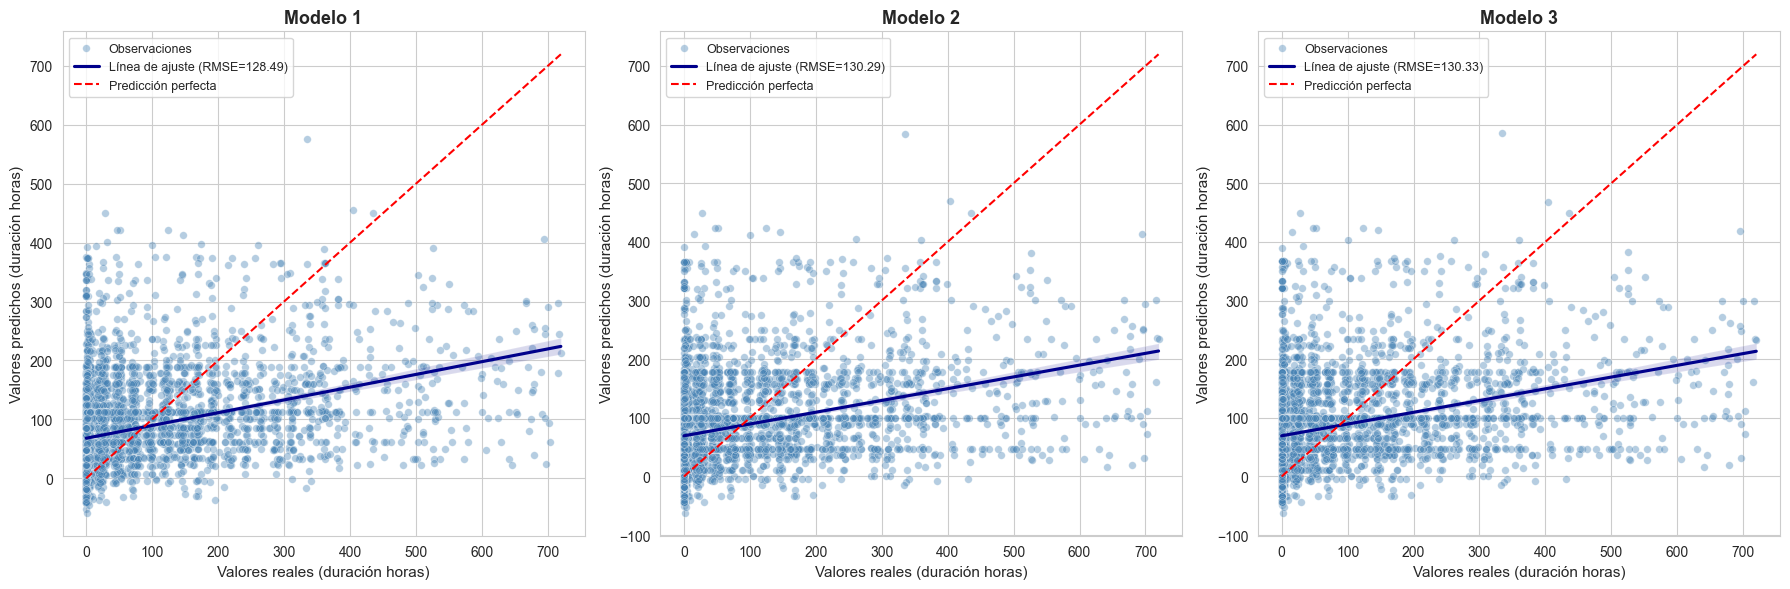

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista con info de cada modelo (nombre, y_real, y_predicho, rmse)
modelos = [
    ("Modelo 1", y_test, y_pred1, rmse1),
    ("Modelo 2", y_test, y_pred2, rmse2),
    ("Modelo 3", y_test, y_pred3, rmse3),
]

plt.figure(figsize=(18,6))

for i, (nombre, y_true, y_pred, rmse) in enumerate(modelos, 1):
    plt.subplot(1, 3, i)
    
    # Puntos
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.4, s=30, color="steelblue", label="Observaciones")
    
    # Línea de ajuste con RMSE en la etiqueta
    sns.regplot(x=y_true, y=y_pred, scatter=False, color="darkblue", 
                label=f"Línea de ajuste (RMSE={rmse:.2f})")
    
    # Línea de predicción perfecta
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()],
             'r--', label="Predicción perfecta")
    
    plt.xlabel("Valores reales (duración horas)", fontsize=11)
    plt.ylabel("Valores predichos (duración horas)", fontsize=11)
    plt.title(nombre, fontsize=13, weight="bold")
    plt.legend(fontsize=9)
    plt.tight_layout()

plt.show()



### Exploracion rapida con otras maneras de modelar, Ridge y Lasso

In [126]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- 1) Definir modelos ---
linreg = LinearRegression()
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 20), cv=5)
lasso_cv = LassoCV(alphas=np.logspace(-3, 1, 20), cv=5, random_state=42, max_iter=10000)

# --- 2) Entrenar ---
linreg.fit(X_train, y_train)
ridge_cv.fit(X_train, y_train)
lasso_cv.fit(X_train, y_train)

# --- 3) Función de métricas ---
def get_metrics(name, model, Xtr, ytr, Xte, yte):
    ytr_pred = model.predict(Xtr)
    yte_pred = model.predict(Xte)
    metrics = {
        "Modelo": name,
        "MAE_train": mean_absolute_error(ytr, ytr_pred),
        "RMSE_train": np.sqrt(mean_squared_error(ytr, ytr_pred)),
        "R2_train": r2_score(ytr, ytr_pred),
        "MAE_test": mean_absolute_error(yte, yte_pred),
        "RMSE_test": np.sqrt(mean_squared_error(yte, yte_pred)),
        "R2_test": r2_score(yte, yte_pred),
    }
    return metrics

# --- 4) Guardar resultados ---
results = []
results.append(get_metrics("Linear", linreg, X_train, y_train, X_test, y_test))
results.append(get_metrics("Ridge", ridge_cv, X_train, y_train, X_test, y_test))
results.append(get_metrics("Lasso", lasso_cv, X_train, y_train, X_test, y_test))

summary = pd.DataFrame(results)

# --- 5) Mostrar resultados ---
print("=== Comparación de modelos ===")
display(summary.round(3))

print("\nMejor alpha Ridge:", ridge_cv.alpha_)
print("Mejor alpha Lasso:", lasso_cv.alpha_)


=== Comparación de modelos ===


,Modelo,MAE_train,RMSE_train,R2_train,MAE_test,RMSE_test,R2_test
0,Linear,72.578,107.577,0.398,87.756,128.489,0.078
1,Ridge,72.636,107.599,0.398,87.737,128.372,0.080
2,Lasso,72.616,107.605,0.398,87.717,128.489,0.078



Mejor alpha Ridge: 2.976351441631316
Mejor alpha Lasso: 0.018329807108324356


 Conclusión para informe:

Comparación de métodos: Se probaron regresión lineal, Ridge y Lasso, cumpliendo con el requerimiento de usar distintos métodos de estimación.

Hallazgo: Los tres modelos ofrecen desempeño equivalente. La regularización no mejora la predicción, lo que indica que el problema no está en el sobreajuste, sino en la capacidad explicativa de las variables.

Implicación: La mayor limitación está en la información disponible: con las variables actuales, la capacidad predictiva es baja. Incorporar más variables relevantes o explorar transformaciones no lineales podría ser más útil que cambiar el estimador.

Recomendación: Para este dataset, la regresión lineal simple es suficiente; Ridge y Lasso no aportan mejora sustancial.

### Prediccion interactiva


In [ ]:
# ======================
# PREDICCIÓN INTERACTIVA
# ======================

import pandas as pd
import numpy as np

# ---- CONFIGURACIÓN ----
# Cambia a True si entrenaste con y = log1p(duracion_horas)
USE_LOG_TARGET = False

# Si tu modelo entrenado no se llama 'linreg', pon aquí la variable correcta
MODEL = linreg

# (Opcional) Cortar predicciones negativas a 0 en caso de usar target sin log
CLIP_NON_NEGATIVE = True

# ---- FUNCIONES AUXILIARES ----
def transformar_nuevo(df_new: pd.DataFrame,cluster_maps: dict,high_card_cols: list,low_card_cols: list,cols_union: pd.Index) -> pd.DataFrame:
    """Retorna una matriz con las variables ya codificadas en dummies y listas coo insumo """

    Z = df_new.copy()

    # 1) Asignar clusters a columnas de alta cardinalidad. Si hay una entrada no reconocida, le pone el cluster -1. es como categoria de other
    for col in high_card_cols:
        newc = f"{col}_cluster"
        # categorías no vistas -> -1
        Z[newc] = Z[col].map(cluster_maps[col]).fillna(-1).astype(int).astype(str)

    # 2) One-hot de (baja cardinalidad + *_cluster) con drop_first=True para evitar multicolinealidad
    cluster_cols = [f"{c}_cluster" for c in high_card_cols]
    Z_cat = pd.get_dummies(Z[low_card_cols + cluster_cols], drop_first=True)

    # 3) Alinear columnas a las del entrenamiento
    Z_cat = Z_cat.reindex(columns=cols_union, fill_value=0)

    return Z_cat


def pedir_valores_usuario(campos: list) -> pd.DataFrame:
    """Pide por consola el valor de cada campo categórico y retorna un DataFrame de 1 fila. Esto es lo que se pide en transformar nuevo"""
    print("\nIngresa el valor para cada campo (tal como aparece en tus datos).")
    registro = {}
    for c in campos:
        v = input(f"  {c}: ").strip()
        registro[c] = v
    return pd.DataFrame([registro])


# ---- LISTA DE CAMPOS QUE PEDIRÁS AL USUARIO ----
# Usaremos exactamente las mismas columnas categóricas originales:
# alta cardinalidad = cols (ya clusterizadas)
# baja cardinalidad = low_card_cols (que convertiste a dummies)

#Definir los campos que el usuario tiene que ingresar para pdoer predecir
campos_entrada = cols + low_card_cols  # el orden no importa


# ---- LOOP DE PREDICCIÓN INTERACTIVA ----
while True:
    print("\n=== Nuevo ticket ===")
    df_usuario = pedir_valores_usuario(campos_entrada) 

    # Transformar igual que en entrenamiento
    X_nuevo = transformar_nuevo( df_new=df_usuario,cluster_maps=cluster_maps,high_card_cols=cols,low_card_cols=low_card_cols,cols_union=cols_union)

    # Predecir
    y_hat = MODEL.predict(X_nuevo)
    
    # Si entrenaste con log1p, vuelve a escala original
    if USE_LOG_TARGET:
        y_hat = np.expm1(y_hat)

    # (opcional) evitar negativos en la salida si trabajas en escala original
    if CLIP_NON_NEGATIVE and not USE_LOG_TARGET:
        y_hat = np.maximum(y_hat, 0)

    print(f"\nDuración predicha del ticket: {float(y_hat[0]):.2f} horas")

    cont = input("\n¿Deseas predecir otro ticket? (s/n): ").strip().lower()
    if cont != "s":
        print("¡Listo! Fin de la predicción interactiva.")
        break



=== Nuevo ticket ===

Ingresa el valor para cada campo (tal como aparece en tus datos).

Duración predicha del ticket: 9.72 horas
¡Listo! Fin de la predicción interactiva.


In [ ]:
import pandas as pd

def transformar_nuevo(df_new, cluster_maps, high_card_cols, low_card_cols, cols_union):
    Z = df_new.copy()

    # 1) mapear clusters
    for col in high_card_cols:
        newc = f"{col}_cluster"
        Z[newc] = Z[col].map(cluster_maps.get(col, {})).fillna(-1).astype(int).astype(str)

    # 2) dummies
    cluster_cols = [f"{c}_cluster" for c in high_card_cols]
    Z_cat = pd.get_dummies(Z[low_card_cols + cluster_cols], drop_first=True)

    # 3) alinear columnas
    Z_cat = Z_cat.reindex(columns=cols_union, fill_value=0)

    return Z_cat

# Ejemplo de ticket nuevo
df_new = pd.DataFrame([{
    "caller_id": "Caller 2403",
    "opened_by": "Opened by  8",
    "location": "Location 165",
    "category": "Category 40",
    "subcategory": "Subcategory 215",
    "u_symptom": "Symptom 471",
    "priority": "2 - High",
    "assignment_group": "Group 24",
    "assigned_to": "Resolver 89",
    "u_priority_confirmation": "true", 
    "contact_type": "Phone"
}])

X_nuevo = transformar_nuevo(df_new, cluster_maps, high_card_cols, low_card_cols, cols_union)
pred = linreg.predict(X_nuevo)
print("Duración predicha:", float(pred[0]), "horas")

Duración predicha: 9.719490692434405 horas


### Crear archivo con los insumos necesarios para predecir en DASH

In [ ]:
import os, json, joblib, zipfile

# Carpeta para artefactos
ARTIF_DIR = "artefactos_modelo"
os.makedirs(ARTIF_DIR, exist_ok=True)

# 1. Modelo entrenado
joblib.dump(linreg, f"{ARTIF_DIR}/model.pkl")

# 2. Mapas de clusters y listas de columnas
with open(f"{ARTIF_DIR}/cluster_maps.json", "w", encoding="utf-8") as f:
    json.dump(cluster_maps, f, ensure_ascii=False)

with open(f"{ARTIF_DIR}/high_card_cols.json", "w", encoding="utf-8") as f:
    json.dump(cols, f, ensure_ascii=False)

with open(f"{ARTIF_DIR}/low_card_cols.json", "w", encoding="utf-8") as f:
    json.dump(low_card_cols, f, ensure_ascii=False)

with open(f"{ARTIF_DIR}/cols_union.json", "w", encoding="utf-8") as f:
    json.dump(list(cols_union), f, ensure_ascii=False)

# 3. Crear ZIP con todo
with zipfile.ZipFile("modelo_ticket.zip", "w") as z:
    for root, _, files in os.walk(ARTIF_DIR):
        for file in files:
            z.write(os.path.join(root, file))

print("✅ Modelo y artefactos guardados en modelo_ticket.zip")


✅ Modelo y artefactos guardados en modelo_ticket.zip
